In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cleaned_data = pd.read_csv('./cleaned_data.csv')
cleaned_data = cleaned_data.dropna()

sentiment_count = cleaned_data['sentiment'].value_counts()
total = len(cleaned_data)
lowest_emotion_num = sentiment_count.min()
imbalance = lowest_emotion_num / total

print(f"Data loaded: {total} comments")
print(f"Sentiment distribution: {sentiment_count.to_dict()}")
print(f"Class imbalance ratio: {imbalance:.3f}")

Data loaded: 152070 comments
Sentiment distribution: {'negative': 60020, 'positive': 55872, 'neutral': 36178}
Class imbalance ratio: 0.238


In [5]:
print("\nStep 1: Converting text to numerical vectors...")

# Word-level features
word_vectorizer = TfidfVectorizer(
    max_features=8000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95,
    sublinear_tf=True
)

print("Creating word features...")

# Create features for all data
X = word_vectorizer.fit_transform(cleaned_data['comment_text'])
y = cleaned_data['sentiment']

print(f"Features created: {X.shape}")
print(f"Number of comments: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")



Step 1: Converting text to numerical vectors...
Creating word features...
Features created: (152070, 8000)
Number of comments: 152070
Number of features: 8000


In [6]:
# Split the data
print("\nStep 2: Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Step 2: Splitting data into training and testing sets...
Training set size: 121656
Testing set size: 30414


In [7]:
# Train Random Forest model
print("\nStep 3: Training Random Forest model...")
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=400,
    min_samples_split=3,   # More splits
    min_samples_leaf=1,    # Smaller leaves
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

print("\nStep 4: Making predictions...")
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nStep 5: Evaluating the model...")
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")


Step 3: Training Random Forest model...

Step 4: Making predictions...

Step 5: Evaluating the model...
Random Forest Model Accuracy: 0.8107 (81.07%)


In [8]:
print("\nStep 6: Analyzing feature importance...")
feature_names = word_vectorizer.get_feature_names_out()
importance = rf_model.feature_importances_

# Get top 15 most important features
top_indices = np.argsort(importance)[-15:]
top_features = [(feature_names[i], importance[i]) for i in top_indices]
top_features.reverse()

print("\nTop 15 Most Important Words:")
for i, (word, imp) in enumerate(top_features, 1):
    print(f"{i:2d}. {word:20s} - {imp:.4f}")


Step 6: Analyzing feature importance...

Top 15 Most Important Words:
 1. thanks               - 0.0241
 2. fuck                 - 0.0197
 3. like                 - 0.0183
 4. good                 - 0.0140
 5. thank                - 0.0112
 6. shit                 - 0.0108
 7. fucking              - 0.0104
 8. stupid               - 0.0095
 9. ass                  - 0.0074
10. help                 - 0.0073
11. best                 - 0.0070
12. article              - 0.0060
13. want                 - 0.0059
14. suck                 - 0.0059
15. hell                 - 0.0058



Step 7: Creating visualizations...


NameError: name 'cm' is not defined

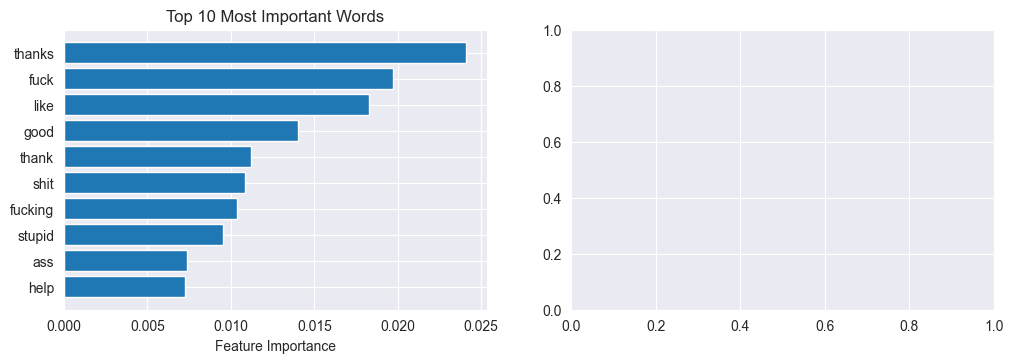

In [9]:
# Visualizations
print("\nStep 7: Creating visualizations...")

# 1. Feature importance plot
plt.figure(figsize=(12, 8))
top_10_features = top_features[:10]
words, importances = zip(*top_10_features)

plt.subplot(2, 2, 1)
plt.barh(range(len(words)), importances)
plt.yticks(range(len(words)), words)
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Words')
plt.gca().invert_yaxis()

# 2. Confusion matrix heatmap
plt.subplot(2, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# 3. Accuracy by sentiment class
plt.subplot(2, 2, 3)
class_accuracy = cm.diagonal() / cm.sum(axis=1)
classes = ['Negative', 'Neutral', 'Positive']
plt.bar(classes, class_accuracy)
plt.title('Accuracy by Sentiment Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# 4. Model performance summary
plt.subplot(2, 2, 4)
plt.text(0.1, 0.8, f'Overall Accuracy: {accuracy*100:.2f}%', fontsize=12)
plt.text(0.1, 0.6, f'Number of Trees: {rf_model.n_estimators}', fontsize=12)
plt.text(0.1, 0.4, f'Max Depth: {rf_model.max_depth}', fontsize=12)
plt.text(0.1, 0.2, f'Features Used: {X.shape[1]}', fontsize=12)
plt.axis('off')
plt.title('Model Summary')

plt.tight_layout()
plt.savefig('random_forest_results.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nResults saved to 'random_forest_results.png'")
print(f"Random Forest Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")


In [10]:
# Model comparison summary
print("\n" + "="*50)
print("RANDOM FOREST MODEL SUMMARY")
print("="*50)
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Number of Trees: {rf_model.n_estimators}")
print(f"Max Depth: {rf_model.max_depth}")
print(f"Features Used: {X.shape[1]}")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")
print("="*50)


RANDOM FOREST MODEL SUMMARY
Accuracy: 81.07%
Number of Trees: 200
Max Depth: 400
Features Used: 8000
Training Samples: 121656
Testing Samples: 30414
